### Aim:

To build machine learning models that would help in predicing the pricing of data on Airbnb

### Exploratory Data Analysis

EDA is a set of statistical approaches to explore and understand data beyond hypothesis testing and experimentation. It unearth any underlying insights. The goal of this step is to understand the dataset, identify the missing values & outliers if any using visual and quantitative methods to get a sense of the story it tells. It suggests the next logical steps, questions or areas of research for your project. It is always better to explore each data set using multiple exploratory techniques and compare the results. 

##### Steps of Exploratory Data Analysis:
1. Identification of variables and data types
2. Non- Graphical univariate analysis
3. Cleaning data -> missing data, normalization, scaling etc
4. Graphical univariate analysis
5. Outlier treatment
6. Correlation Analysis


##### 1. Identification of variables and data types

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings_Amsterdam.csv') # Import Data from the csv file
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.04,1,158
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,NaN,Centrum-West,52.37802,4.89270,Entire home/apt,119,3,55,2018-06-29,0.44,1,17
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.72,2,31
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.17,1,212
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,217,2020-03-02,2.12,1,235


In [3]:
print(df.shape) # returns the shape of an array (dimensions)

(19352, 16)


In [4]:
print(df.info()) # Information about the columns (No of columns, Column names and Column types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19352 entries, 0 to 19351
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19352 non-null  int64  
 1   name                            19319 non-null  object 
 2   host_id                         19352 non-null  int64  
 3   host_name                       19341 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   19352 non-null  object 
 6   latitude                        19352 non-null  float64
 7   longitude                       19352 non-null  float64
 8   room_type                       19352 non-null  object 
 9   price                           19352 non-null  int64  
 10  minimum_nights                  19352 non-null  int64  
 11  number_of_reviews               19352 non-null  int64  
 12  last_review                     

In [5]:
print(df._get_numeric_data().columns.tolist()) # numeric columns
print(len(df._get_numeric_data().columns)) # no of numeric columns

['id', 'host_id', 'neighbourhood_group', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
11


In [6]:
cat = list(set(df.columns) - set(df._get_numeric_data().columns)) # categorical columns
print(cat)
print(len(cat)) # no of categorical columns

['room_type', 'name', 'neighbourhood', 'last_review', 'host_name']
5


In [7]:
cols = ['id', 'host_id', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews', 'availability_365', 'minimum_nights']
data = df[cols]

In [8]:
# determine the number of missing entries in each column
for col in data.columns:
    print(col + ', No of Missing Values:', len(data[col][data[col].isnull()]))

id, No of Missing Values: 0
host_id, No of Missing Values: 0
latitude, No of Missing Values: 0
longitude, No of Missing Values: 0
room_type, No of Missing Values: 0
price, No of Missing Values: 0
number_of_reviews, No of Missing Values: 0
availability_365, No of Missing Values: 0
minimum_nights, No of Missing Values: 0


In [9]:
if len(data['id']) == len(set(data['id'])):
    print('All unique values')
else:
    print('Some repeat values')

All unique values


In [10]:
if len(data['host_id']) == len(set(data['host_id'])):
    print('All unique values')
else:
    print('Some repeat values')

Some repeat values


In [11]:
if len(data['room_type']) == len(set(data['room_type'])):
    print('All unique values')
else:
    print('Some repeat values')

Some repeat values


In [12]:
# Categorizing differernt listings based on room_type

roomType_DF = data.groupby('room_type').id.count()
roomType_DF = roomType_DF.reset_index()
roomType_DF = roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

,room_type,number_Of_Listings
0,Entire home/apt,15107
1,Hotel room,267
2,Private room,3918
3,Shared room,60


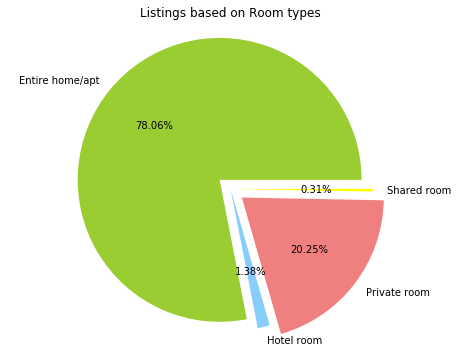

In [13]:
total = sum(roomType_DF.number_Of_Listings)

labels = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']
sizes = [roomType_DF.number_Of_Listings[0]/total, roomType_DF.number_Of_Listings[1]/total, roomType_DF.number_Of_Listings[2]/total, roomType_DF.number_Of_Listings[3]/total]
colors = ['yellowgreen', 'lightskyblue', 'lightcoral', 'yellow']
explode = (0.1, 0, 0.1, 0)
# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=False)

plt.axis('equal')
plt.title('Listings based on Room types')
plt.show()

##### 2. Correlation plots

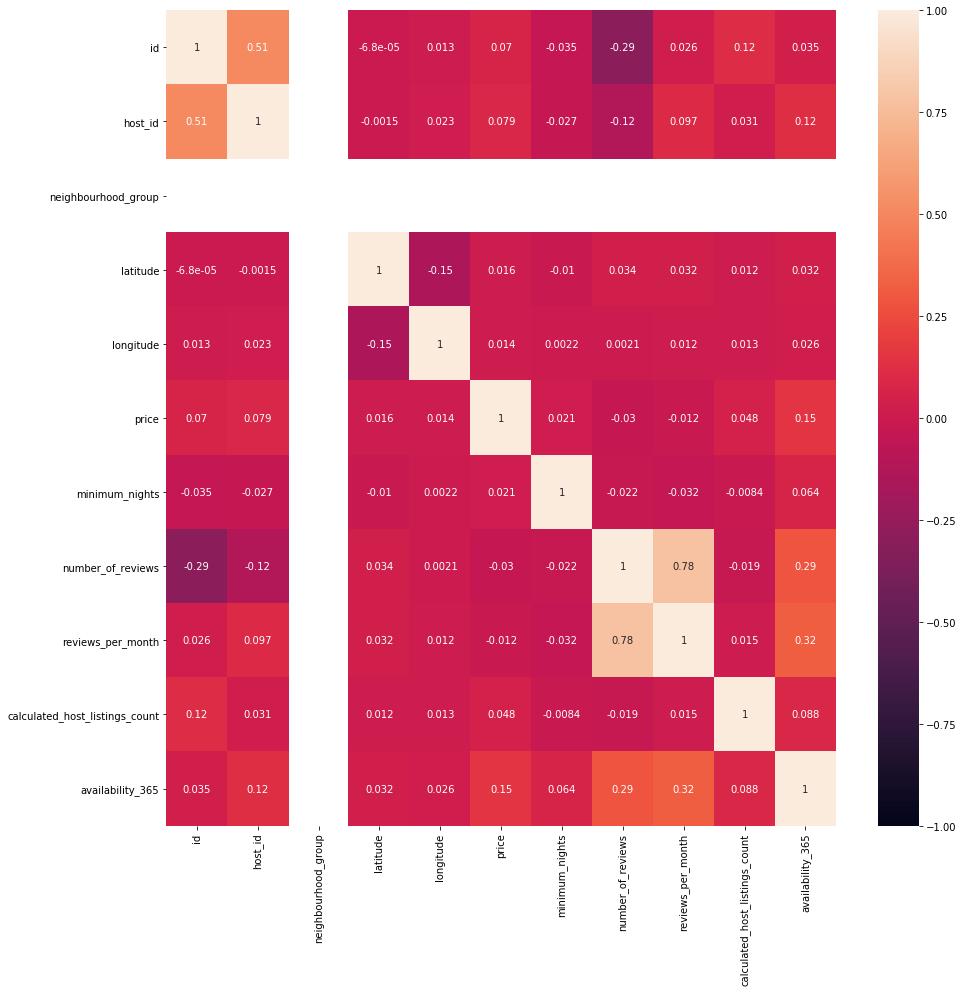

In [14]:
import seaborn as sns

plt.figure(figsize = (15,15))
_ = sns.heatmap(df.corr(), annot=True, vmin= -1 , vmax=1)

##### 3. Feature Selection

In [15]:
data1 = df[df._get_numeric_data().columns]

In [16]:
# determine the number of missing entries in each column
for col in data1.columns:
    print(col + ', No of Missing Values:', len(data1[col][data1[col].isnull()]))

id, No of Missing Values: 0
host_id, No of Missing Values: 0
neighbourhood_group, No of Missing Values: 19352
latitude, No of Missing Values: 0
longitude, No of Missing Values: 0
price, No of Missing Values: 0
minimum_nights, No of Missing Values: 0
number_of_reviews, No of Missing Values: 0
reviews_per_month, No of Missing Values: 2392
calculated_host_listings_count, No of Missing Values: 0
availability_365, No of Missing Values: 0


In [17]:
import statsmodels.api as sm 

y = data1['price']
X = data1.drop(['price', 'neighbourhood_group', 'reviews_per_month'] ,1)

In [18]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
p_list = []
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)    
    p_list.append(p)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['id', 'host_id', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']


In [19]:
# Embedded Method
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 985057229.994765
Best score using built-in LassoCV: 0.003549
Lasso picked 1 variables and eliminated the other 7 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

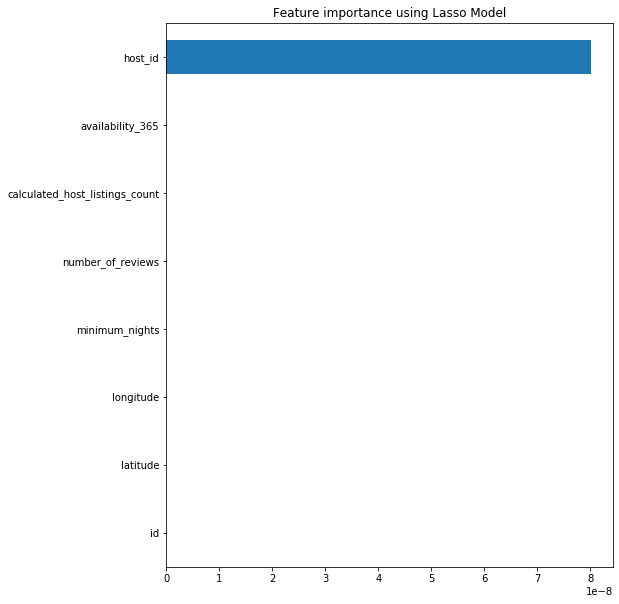

In [20]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

##### 3. Different models

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

In [22]:
import signal

def signal_handler(signum, frame):
    raise Exception("Timed out!")

In [23]:
import warnings

def model_metrics(X_train, X_val, y_train, y_val, Models):
    warnings.filterwarnings('ignore')
    for i in range(len(Models)):
        if Models[i] == 'Linear Regression':
            ML = LinearRegression()
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Ridge Regression':
            ML = Ridge(alpha= 1.5)
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Lasso Regression':
            ML = Lasso(alpha= 1)
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Stochastic Gradient Descent':
            ML = SGDRegressor(max_iter=10000, tol=1e-3)
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Random Forest Regressor':
            ML = RandomForestRegressor(n_estimators=10)
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'K nearest neighbors':
            ML = neighbors.KNeighborsRegressor(n_neighbors = 25)
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Support Vector Regression - Kernel = Linear':
            ML = SVR(kernel = 'linear')
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Support Vector Regression - Kernel = Poly':
            ML = SVR(kernel = 'poly', degree = 5, gamma = 'scale')
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Support Vector Regression - Kernel = rbf':
            ML = SVR(kernel = 'rbf', gamma = 'scale')
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Support Vector Regression - kernel = sigmoid':
            ML = SVR(kernel = 'sigmoid', gamma = 'scale')
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Decision Trees':
            ML = tree.DecisionTreeRegressor()
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Multi-layer Perceptron':
            ML = MLPRegressor(alpha = 0.1)
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Gradient Boosting Regression - loss = ls':
            ML = GradientBoostingRegressor(loss='ls')
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Gradient Boosting Regression - loss = lad':
            ML = GradientBoostingRegressor(loss='lad')
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Gradient Boosting Regression - loss = huber':
            ML = GradientBoostingRegressor(loss='huber')
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Gradient Boosting Regression - loss = quantile':
            ML = GradientBoostingRegressor(loss='quantile')
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
        elif Models[i] == 'Gaussian Process Regression':
            ML = GaussianProcessRegressor(random_state=42)
            signal.signal(signal.SIGALRM, signal_handler)
            signal.alarm(10)   # Ten seconds
            try:
                long_function_call()
            except:
                print("Timed out!")
            
        
        
        X = X_train + X_val
        y = y_train + y_val
        
        ML.fit(X_train, y_train)
        y_pred = ML.predict(X_val)
        print(Models[i])
        print("Mean Absolute Error:", metrics.mean_absolute_error(y_val, y_pred))
        print("Mean Squared Error:", metrics.mean_squared_error(y_val, y_pred))
        print("R^2:", metrics.r2_score(y_val, y_pred))
        adj = 1 - ((len(y)-1)/(len(y)-X.shape[1]-1)*(1 - metrics.r2_score(y_val,y_pred)))
        print("Adjusted R^2:", adj)
        print('_'*50)

In [24]:
def train_val_func(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)
    return (X_train, X_val, y_train, y_val)

In [25]:
Models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
          'Stochastic Gradient Descent', 'Random Forest Regressor',
          'K nearest neighbors', 'Decision Trees', 'Multi-layer Perceptron', 
          'Gaussian Process Regression',
          'Support Vector Regression - Kernel = Linear',
          'Support Vector Regression - Kernel = Poly', 
          'Support Vector Regression - Kernel = rbf', 
          'Support Vector Regression - kernel = sigmoid', 
          'Gradient Boosting regression - loss = ls', 
          'Gradient Boosting regression - loss = lad', 
          'Gradient Boosting regression - loss = huber', 
          'Gradient Boosting regression - loss = quantile']

In [26]:
y = data1['price']
X = data1.drop(['price', 'neighbourhood_group', 'reviews_per_month'] ,1)

X_train, X_val, y_train, y_val = train_val_func(X, y)
model_metrics(X_train, X_val, y_train, y_val, Models)

AttributeError: module 'signal' has no attribute 'SIGALRM'